In [14]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as rms
from sklearn.metrics import roc_auc_score
from math import exp

In [22]:
data = pd.read_csv('data-logistic.csv', header=None, names = ['target','X1','X2'])

In [59]:
x = data.drop(['target'], axis = 1)
y = data['target']

In [60]:
x = np.array([x.X1,x.X2])
x

array([[-6.63826537e-01,  1.99459550e+00, -1.24739492e+00,
         2.30937425e+00,  8.49143314e-01,  1.45427095e+00,
         2.25422743e+00, -6.75795166e-02, -8.61960913e-01,
         6.99178929e-01, -1.61479961e-01, -1.47102261e-01,
         8.02959560e-02,  1.72065543e+00,  1.57395765e+00,
         1.16844518e+00, -6.66273601e-02,  1.16335473e+00,
         2.09696979e+00,  3.03570513e+00,  8.31852059e-01,
        -1.29778002e+01, -8.42603085e-01, -4.73536723e-01,
         1.54037313e+00,  4.95341113e-01,  2.09148604e+00,
         2.93705461e+00, -5.01666814e-01,  8.30206648e-01,
        -3.90148300e-01, -5.27212710e-01,  3.37816843e+00,
         3.37315300e+00, -2.10285721e-01,  2.54252027e+00,
         1.99496894e+00,  1.94828754e+00,  1.26893596e+00,
         2.61003333e+00,  1.85952947e+00, -1.08183554e+00,
         1.07128284e+00, -2.56858396e-01,  9.38829978e-02,
         1.60243555e+00,  4.17917351e+00, -3.87270460e-01,
         7.08176077e-01,  3.94512322e-02,  1.89654827e+0

In [63]:
y = np.array(y)

In [64]:
y

array([-1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1], dtype=int64)

In [61]:
data.drop(['target'], axis = 1)

,X1,X2
0,-0.663827,-0.138526
1,1.994596,2.468025
2,-1.247395,0.749425
3,2.309374,1.899836
4,0.849143,2.407750
5,1.454271,-0.665416
6,2.254227,2.263786
7,-0.067580,1.469141
8,-0.861961,-0.824856
9,0.699179,2.032488


In [121]:
k = 0.1
ERROR = 1e-5
def sigma_y(i, w1, w2):
    return (1. / (1. + exp(-y[i]*(w1*x[0][i]+w2*x[1][i]))))

def delta_for_w(w_index, w1, w2, C):
    vector = sum(y[i]*x[w_index][i]*(1-sigma_y(i, w1, w2)) for i in range(0,len(y)))
    vector *= k / len(y)
    vector -= k * C * (w1 if w_index == 0 else w2)
    return vector

def gradient_regressor(C, iteretions_remaining=10000):
    changed_w1 = 0
    changed_w2 = 0
    for iterat in range(iteretions_remaining):
        w1,w2 = changed_w1, changed_w2
        changed_w1 = w1 + delta_for_w(0, w1, w2, C)
        changed_w2 = w2 + delta_for_w(1, w1, w2, C)
        if np.sqrt((w1-changed_w1)*2+(w2-changed_w2)*2)<= (1e-5):
            break
    return(changed_w1,changed_w2)

In [128]:
right_w1, right_w2 = gradient_regressor(0)
right_w1_l2, right_w2_l2 = gradient_regressor(10)

C:\Users\mmat9\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


In [153]:
def prediction_regr(w1, w2, xi):
    probability = 1 / (1 + exp(-w1*xi[0]-w2*xi[1]))
    return probability
# x_new = data.drop(['target'], axis = 1)
scores = x_new.apply(lambda xi: prediction_regr(right_w1, right_w2, xi), axis = 1)
scores = np.array(scores)
scores_l2 = x_new.apply(lambda xi: prediction_regr(right_w1_l2, right_w2_l2, xi), axis = 1)

In [154]:
y = np.array(data.target)

In [155]:
roc_auc_score(y, scores), roc_auc_score(y, scores_l2)



(0.9267619047619047, 0.9362857142857142)

No handles with labels found to put in legend.


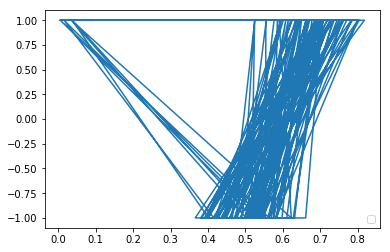

In [162]:
import scikitplot as skplt
import matplotlib.pyplot as plt

plt.plot(scores,y)
plt.legend(loc=4)
plt.show()

In [143]:
target = pd.DataFrame(data=data.target)

In [103]:
w1, w2 = gradient_regressor(0.)
l2w1, l2w2 = gradient_regressor(10.)

print(w1, w2, l2w1, l2w2)

scores = x.apply(lambda xi: sigma(xi, w1, w2), axis=1)
l2scores = x.apply(lambda xi: sigma(xi, l2w1, l2w2), axis=1)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [27]:
auc_score = roc_auc_score(y, scores)
l2_auc_score = roc_auc_score(y, l2scores)

print(auc_score)
print(l2_auc_score)

f = open('submission.txt', 'w')
f.write(str(auc_score) + ' ' + str(l2_auc_score))
f.close()

NameError: name 'scores' is not defined